# Plot Lyapunov exponents and Eigenvalues for Active Filament simulations

In [1]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')
# Create a folder for storing Publication figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure3'

import _figure_parameters

linux system
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', '

# No:of Significant Eigenvalues Plot

In [11]:
# batch_analysis_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23'

batch_analysis_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweeps_diffActivityTimeScales_FINAL/activityTime_750'
parameter = 'potDipole strength'

df_sig_eigenvalues = pd.DataFrame({})

for root, dirs, files in os.walk(batch_analysis_folder):
    
    for file in files:
                
        if('eigenvectors' in file and file.endswith('.hdf5')):
            
            with h5py.File(os.path.join(root, file), "r") as f:

                dset = f['eigenvectors']

                eigenvalues_sig = dset['eigenvalues'][:]
                eigenvectors_sig = dset['eigenvectors'][:]
                pca_dim = dset.attrs['PCA dimension']
                
                print(eigenvalues_sig)
                print(pca_dim)

                n_sig_eigenvalues = len(eigenvalues_sig)
                
                # Load metadata
                base_folder, *rest = os.path.split(root)
                
                df_metadata = pd.read_csv(os.path.join(base_folder, 'metadata.csv'))
                
                # activity number
                viscosity = df_metadata[' viscosity'][0]
                L = (df_metadata['N particles'][0]-1)*df_metadata['bond length'][0]
                kappa = df_metadata['kappa_hat'][0]*df_metadata['bond length'][0]
                radius = df_metadata['radius'][0]
                D0 = df_metadata['potDipole strength'][0]

                activity_number = (viscosity*radius**3*L**2*D0/kappa)
                
                parameter_value = df_metadata[parameter][0]
                
                df_sig_eigenvalues = df_sig_eigenvalues.append(pd.DataFrame({parameter:[parameter_value], 'activity number':activity_number, 'N sig eigenvalues':[n_sig_eigenvalues], 'PCA dimension':[pca_dim]}))
    

[379372.96352212 164676.34803693  25052.77416805]
1.9896057599960786
[379372.07458798 164676.38370552  25052.71301417]
1.9896072926958972
[379370.53541784 164676.36005705  25052.60565486]
1.9896095767834021
[828011.85722633 137837.000484   120828.91683929]
1.789739137708847
[856812.49957323 149208.69873216 115657.34765962]
1.7762426582228288
[859610.21046078 154502.89258428 114814.02193381]
1.7848407353560405
[4.80168227e-21 1.41113791e-21 4.32669364e-22]
1.779529515554481
[8.82312295e-19 2.38776363e-19 8.66157908e-20]
1.7661077575572242
[2.01493256e-19 4.54842379e-20 2.02836339e-20]
1.693655540161482
[1185870.27617094  199818.08824555  137245.03406401]
1.7176399801301632
[1146544.59235397  209119.621616    136274.1033166 ]
1.759371711943269
[1266609.68511251  201196.32426106  136554.48325852]
1.667002173465426
[247131.40771931 133429.39808551  88999.68593538  71638.40023513
  31127.50083722]
3.84012929453255
[247131.36582041 133429.33299977  88999.73010297  71638.4442654
  31127.50860

In [12]:
df_sig_eigenvalues

# Save the n_sig_eigenvalues DataFrame
# processed_data_folder = '/home/deepak/Dropbox/LacryModeling/processed_data/figures'
# file = 'n_sign_eigenvalues.csv'
# df_sig_eigenvalues.to_csv(os.path.join(processed_data_folder, file))

,potDipole strength,activity number,N sig eigenvalues,PCA dimension
0,1.289474,69.394316,3,1.989606
0,1.289474,69.394316,3,1.989607
0,1.289474,69.394316,3,1.989610
0,1.552632,83.556421,3,1.789739
0,1.552632,83.556421,3,1.776243
0,1.552632,83.556421,3,1.784841
0,0.631579,33.989053,3,1.779530
0,0.631579,33.989053,3,1.766108
0,0.631579,33.989053,3,1.693656
0,1.684211,90.637474,3,1.717640


<IPython.core.display.Javascript object>


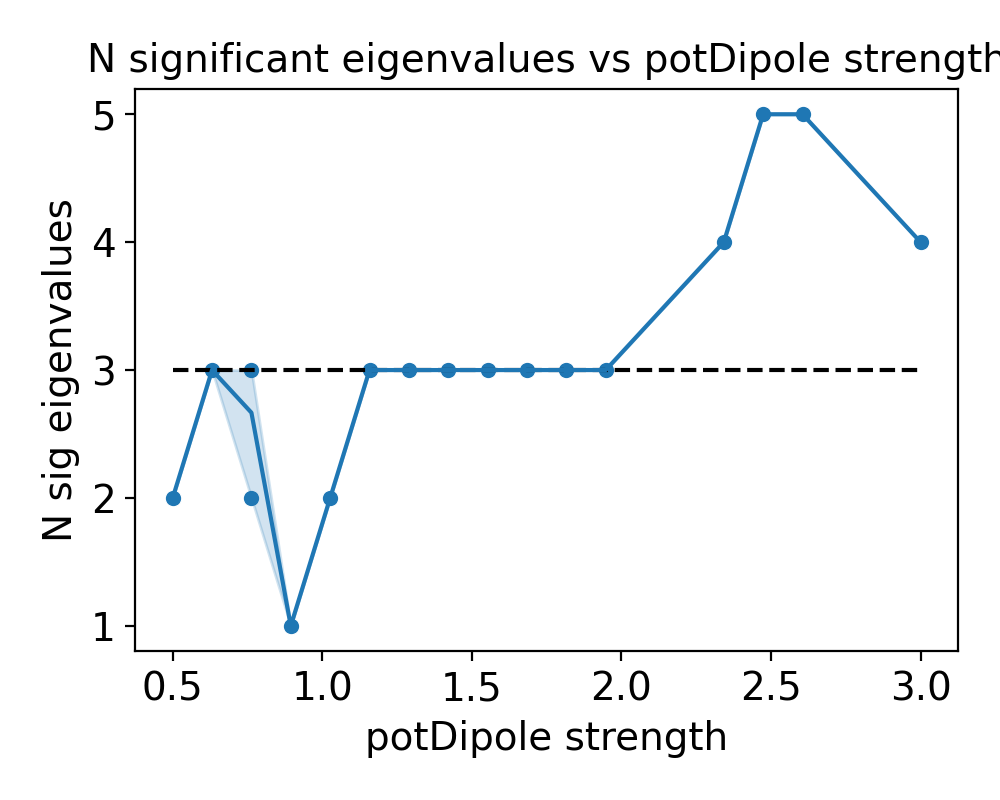

In [13]:
# Plot No:of sign eigenvalues vs parameter of interest
# plt.style.use('default')
save = False

parameter = 'potDipole strength'
title = 'N significant eigenvalues vs {}'.format(parameter)
plt.figure(figsize=(5,4))
sns.scatterplot(data = df_sig_eigenvalues, x = parameter, y = 'N sig eigenvalues', palette = 'dark')
sns.lineplot(data = df_sig_eigenvalues, x = parameter, y = 'N sig eigenvalues', markers = True, palette = 'dark')
plt.hlines(y=3, xmin=min(df_sig_eigenvalues[parameter]),xmax=max(df_sig_eigenvalues[parameter]), linestyle = '--', color = 'k')
plt.title(title)

if save:
    plt.savefig(os.path.join(publication_figures, title+'.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title+'.svg'), dpi = 300)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


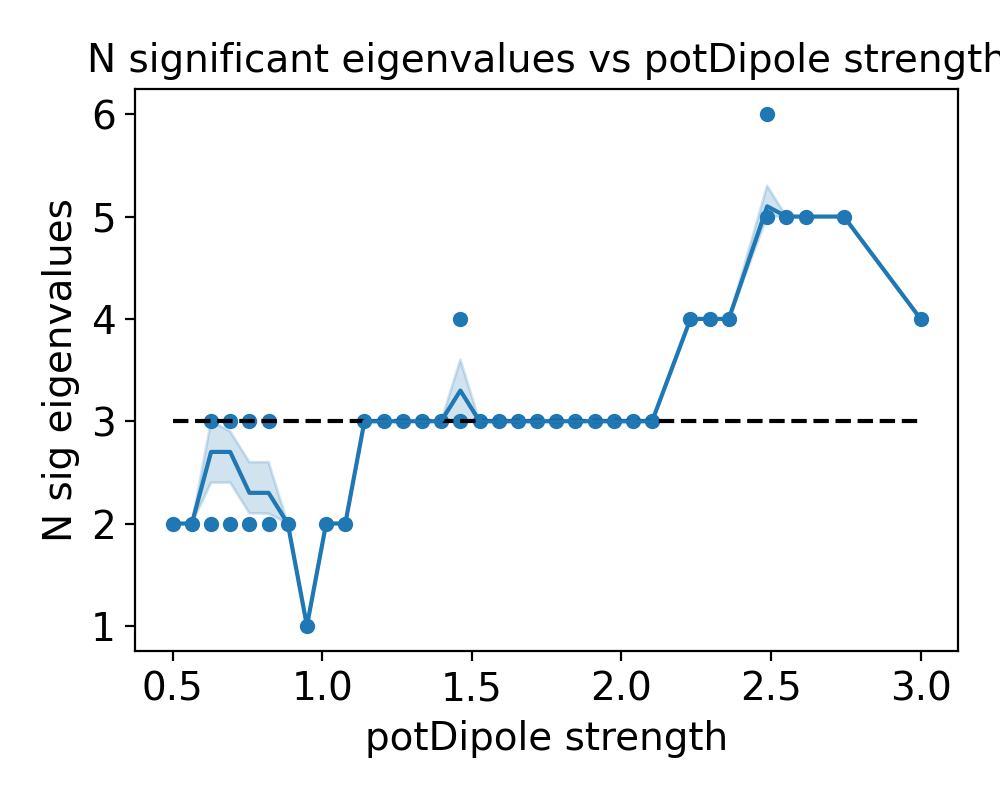

# PCA dimension (Participation ratio)

<IPython.core.display.Javascript object>


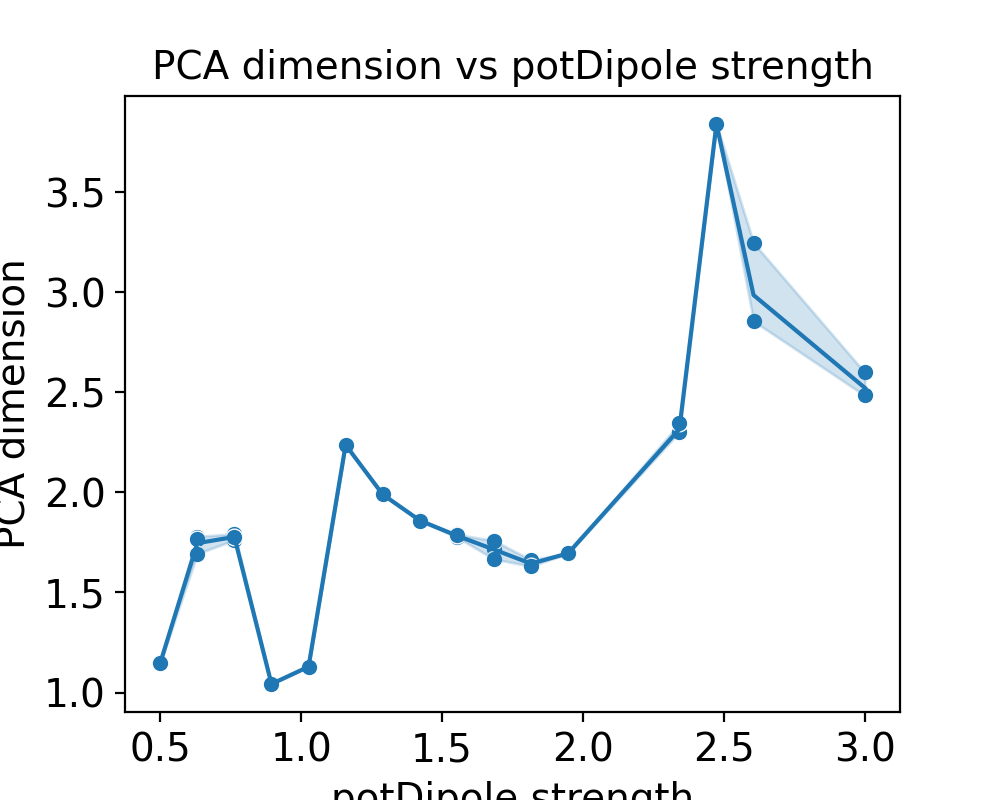

In [14]:
save = False

parameter = 'potDipole strength'
title = 'PCA dimension vs {}'.format(parameter)
plt.figure(figsize=(5,4))
sns.scatterplot(data = df_sig_eigenvalues, x = parameter, y = 'PCA dimension', palette = 'dark')
sns.lineplot(data = df_sig_eigenvalues, x = parameter, y = 'PCA dimension', markers = True, palette = 'dark')
# plt.hlines(y=3, xmin=min(df_sig_eigenvalues[parameter]),xmax=max(df_sig_eigenvalues[parameter]), linestyle = '--', color = 'k')
plt.title(title)

if save:
    plt.savefig(os.path.join(publication_figures, title+'.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title+'.svg'), dpi = 300)

    plt.tight_layout()
plt.show()

# Lyapunov exponent plot

<IPython.core.display.Javascript object>


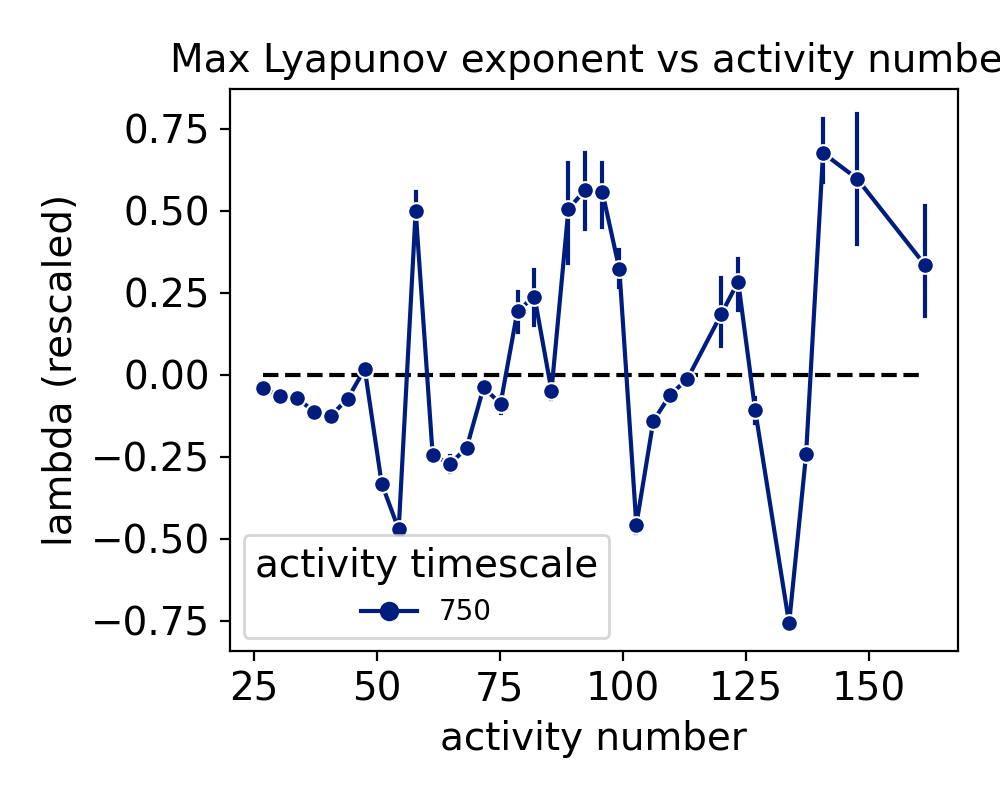

In [8]:
# plt.style.use('default')

processed_data_folder = '/home/deepak/Dropbox/LacryModeling/processed_data'
save_folder = os.path.join(processed_data_folder, 'IC_sensitivity_analysis')

parameter = 'activity number'

file_path = os.path.join(save_folder,'lyapunov_exp_vs_{}.csv'.format(parameter))


if(os.path.exists(file_path)):
    
    df_lyapunov = pd.read_csv(file_path)



# Plot the lyapunov exponent data

import seaborn as sns
%matplotlib notebook

save = False

title = 'Max Lyapunov exponent vs {}'.format(parameter)
plt.figure(figsize=(5,4))
sns.lineplot(data = df_lyapunov, x = parameter, y = 'lambda (rescaled)', style = 'activity timescale', 
             hue="activity timescale", err_style = 'bars', markers = True, color = 'r', palette = 'dark')
plt.hlines(y=0, xmin=min(df_lyapunov[parameter]),xmax=max(df_lyapunov[parameter]), linestyle = '--', color = 'k')
plt.title(title)


if save:
    plt.savefig(os.path.join(publication_figures, title+'.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title+'.svg'), dpi = 300)

plt.tight_layout()
plt.show()

In [8]:
# Calculate the typical value of the max Lyapunov exponent

lyapunov_mean = np.mean(df_lyapunov['lambda (rescaled)'].loc[df_lyapunov['lambda (rescaled)']>0])

lyapunov_min = np.min(df_lyapunov['lambda (rescaled)'].loc[df_lyapunov['lambda (rescaled)']>0])
lyapunov_max = np.max(df_lyapunov['lambda (rescaled)'].loc[df_lyapunov['lambda (rescaled)']>0])

In [11]:
print(lyapunov_mean)

print(lyapunov_min)
print(lyapunov_max)

0.38957374155691993
0.005706336290150379
1.087462138657607


## Predictability Horizon Plot

<IPython.core.display.Javascript object>


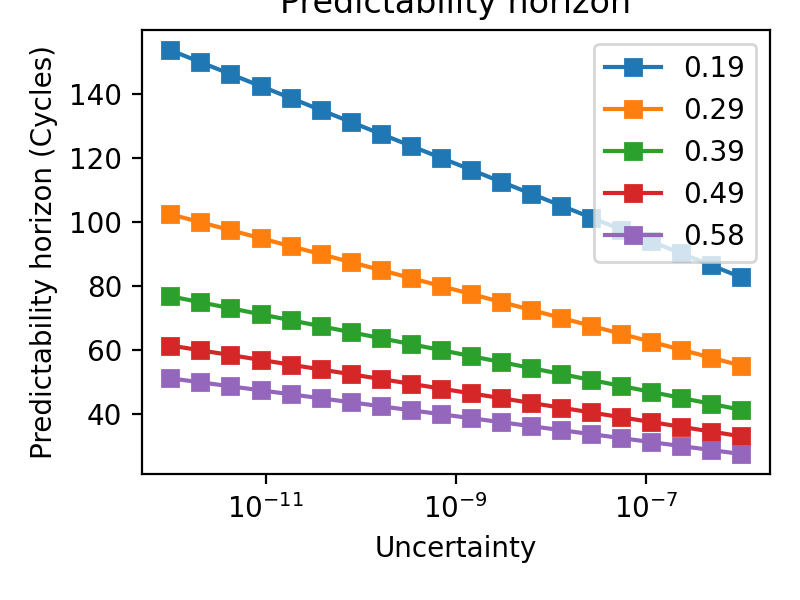

In [25]:
lyapunov_array = np.linspace(0.5*lyapunov_mean, 1.5*lyapunov_mean, 5)

tolerance = 10
delta_0_array = np.logspace(-12, -6, 20)

tau_horizon = np.zeros_like(delta_0_array)


save = True

plt.figure(figsize=(4,3))

title = 'Predictability horizon'

for lyapunov in lyapunov_array:

    tau_horizon = (1/lyapunov)*np.log(tolerance/delta_0_array)

    plt.plot(delta_0_array, tau_horizon, marker = 's', label = np.round(lyapunov,2))
    
    
plt.xlabel('Uncertainty')
plt.ylabel('Predictability horizon (Cycles)')
plt.xscale('log')
plt.tight_layout()
plt.legend()
plt.title(title)
if save:
    plt.savefig(os.path.join(publication_figures, title+'.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title+'.svg'), dpi = 300)
plt.show()